# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv('911.csv',)

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [512]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [140]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [142]:
df.groupby('twp').size()

twp
ABINGTON             5977
AMBLER                601
BERKS COUNTY          284
BRIDGEPORT            555
BRYN ATHYN            173
BUCKS COUNTY          356
CHELTENHAM           4575
CHESTER COUNTY       1139
COLLEGEVILLE          470
CONSHOHOCKEN          851
DELAWARE COUNTY       265
DOUGLASS              933
EAST GREENVILLE       217
EAST NORRITON        2038
FRANCONIA            1352
GREEN LANE             51
HATBORO               832
HATFIELD BORO         199
HATFIELD TOWNSHIP    1732
HORSHAM              3003
JENKINTOWN            586
LANSDALE             1743
LEHIGH COUNTY          30
LIMERICK             2272
LOWER FREDERICK       252
LOWER GWYNEDD        1622
LOWER MERION         8443
LOWER MORELAND       1677
LOWER POTTSGROVE     1679
LOWER PROVIDENCE     3225
                     ... 
PERKIOMEN             472
PHILA COUNTY           43
PLYMOUTH             3158
POTTSTOWN            4146
RED HILL              306
ROCKLEDGE             237
ROYERSFORD            532
SALFORD 

** Take a look at the 'title' column, how many unique title codes are there? **

In [77]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [80]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [129]:
df['Reason']= df['title'].apply(lambda x: x.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [132]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

In [139]:
df.groupby('Reason').size()

Reason
EMS        48877
Fire       14920
Traffic    35695
dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

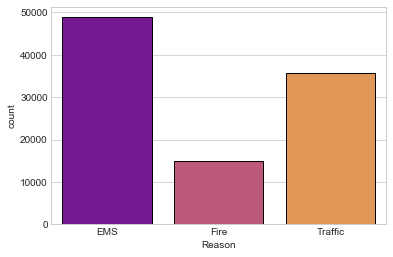

In [150]:
sns.set_style('whitegrid')
sns.countplot(x='Reason',data=df,palette='plasma',edgecolor='k')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [152]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [513]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [177]:
df['timeStamp']= pd.to_datetime(df['timeStamp'])

In [180]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [211]:
df['timeStamp'][0] # takes the 1st row
df['timeStamp'].iloc[0] # takes the 1st row

Timestamp('2015-12-10 17:40:00')

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [223]:
df['hour']= df['timeStamp'].apply(lambda x: x.hour)
df['month']= df['timeStamp'].apply(lambda x:x.month)
df['day of week']= df['timeStamp'].apply(lambda x:x.dayofweek)

In [224]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [236]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [237]:
df['day'] = df['day of week'].map(dmap) # if day of week ==0 return day=mon elif..............continued

In [230]:
df['day of week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: day of week, dtype: int64

In [239]:
df['day'].value_counts()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: day, dtype: int64

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

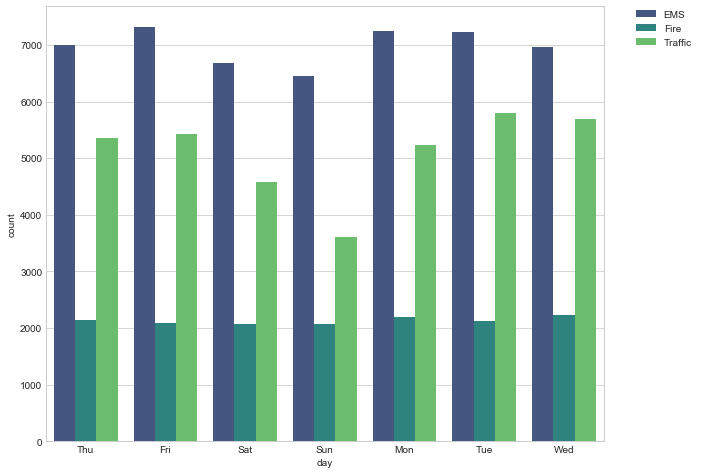

In [250]:
plt.figure(figsize=(10,8))
sns.countplot(x='day',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

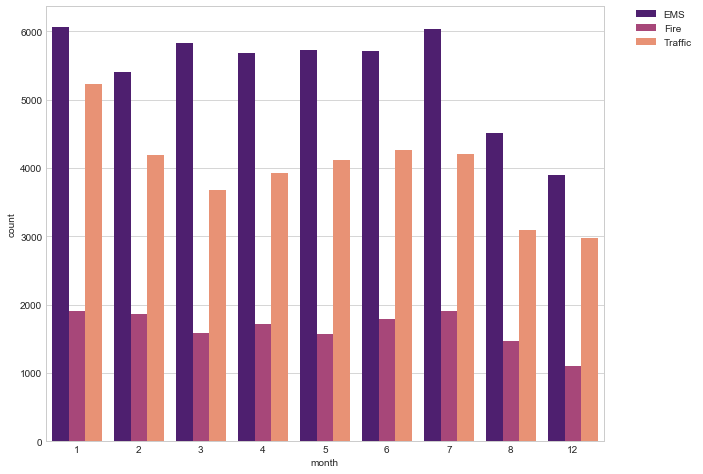

In [253]:
plt.figure(figsize=(10,8))
sns.countplot(x='month',data=df,hue='Reason',palette='magma')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

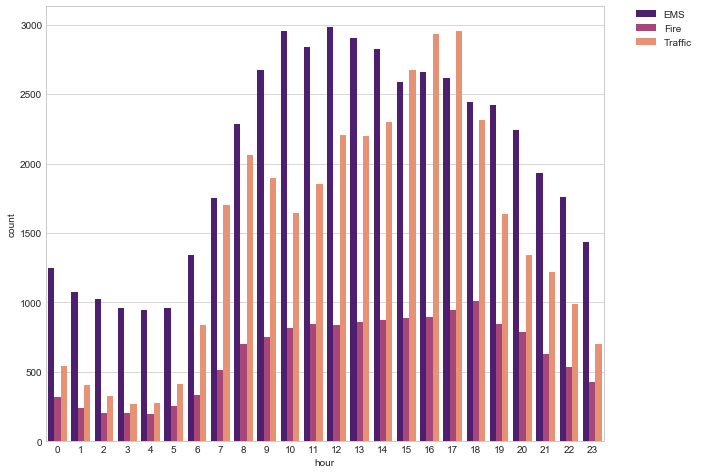

In [255]:
plt.figure(figsize=(10,8))
sns.countplot(x='hour',data=df,hue='Reason',palette='magma')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [262]:
xx = df.groupby('month').count()

In [281]:
xx.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day of week,day
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

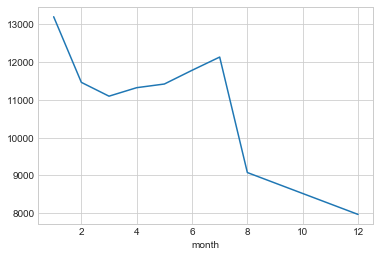

In [271]:
xx['Reason'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [280]:
xx.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,day of week,day
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


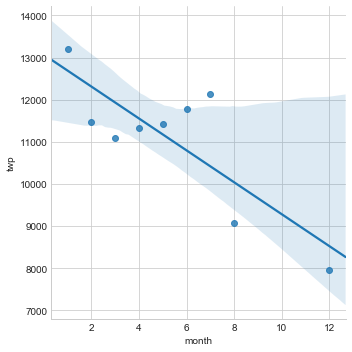

In [295]:
sns.lmplot(x='month',y='twp',data=xx.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [303]:
df['date']= df['timeStamp'].apply(lambda x:x.date())


** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [317]:
d= df.groupby('date').count()
d.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,day
date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


In [318]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10


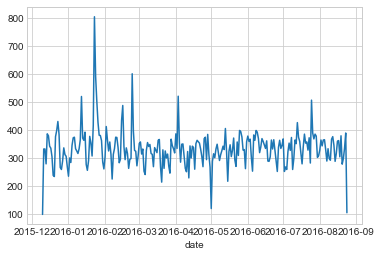

In [321]:
d['zip'].plot()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

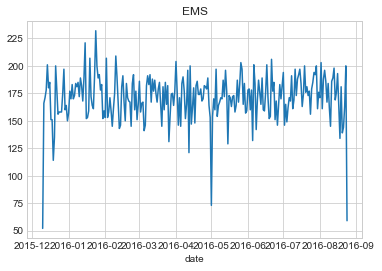

In [333]:
df[df['Reason']=='EMS'].groupby('date').count()['zip'].plot()
plt.title('EMS')
plt.show()

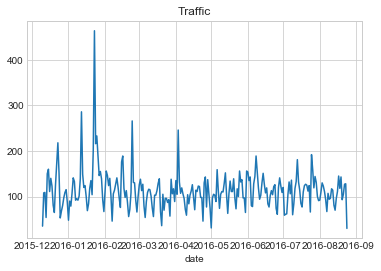

In [367]:
df[df['Reason']=='Traffic'].groupby('date').count()['zip'].plot()
plt.title('Traffic')
plt.show()

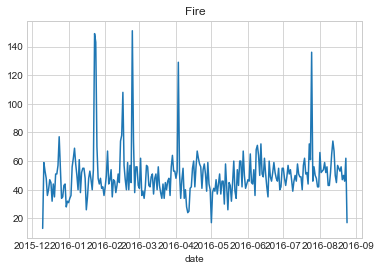

In [376]:
df[df['Reason']=='Fire'].groupby('date').count()['zip'].plot()
plt.title('Fire')
plt.show()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [395]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,Thu,2015-12-10


In [443]:
reason_unstack =  df.groupby(by=['day','hour']).count()['Reason'].unstack() 
# Remember : these are the values of only one variable

In [446]:
reason_unstack

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

**overall reasons heatmap**

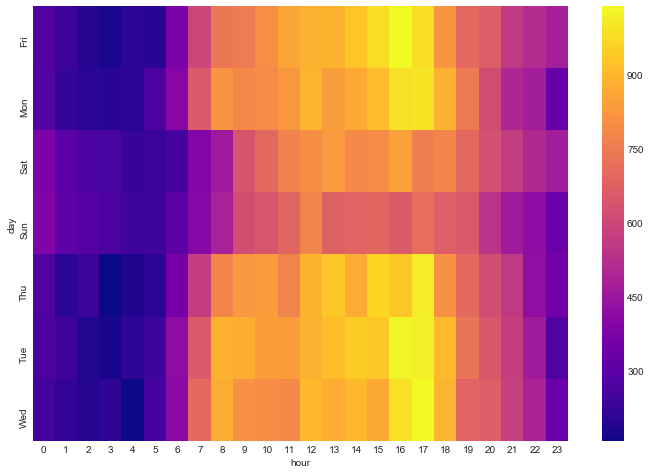

In [458]:
plt.figure(figsize=(12,8))
sns.heatmap(reason_unstack,cmap='plasma')

** EMS heatmap**

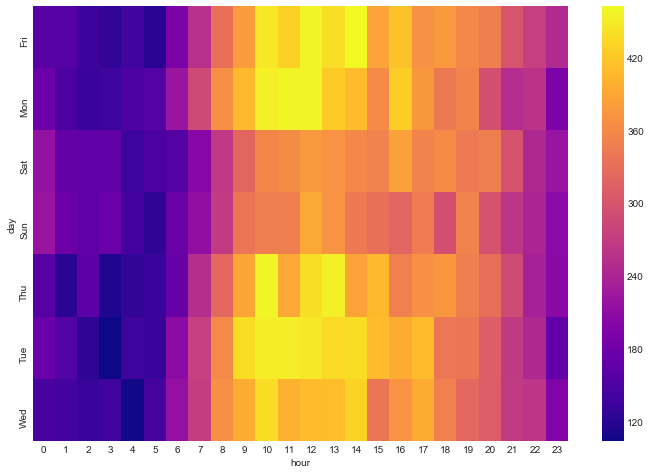

In [465]:
reason_unstack_EMS =  df[df['Reason']=='EMS'].groupby(by=['day','hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,8))
sns.heatmap(reason_unstack_EMS,cmap='plasma')

** Fire heatmap**

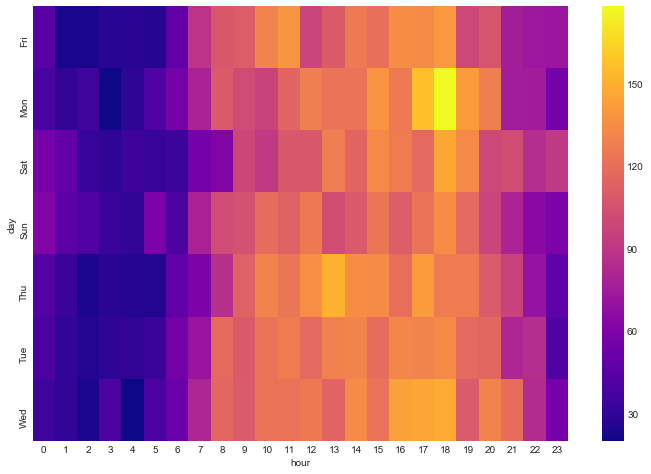

In [474]:
reason_unstack_Fire =  df[df['Reason']=='Fire'].groupby(by=['day','hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,8))
sns.heatmap(reason_unstack_Fire,cmap='plasma')

** Traffic heatmap**

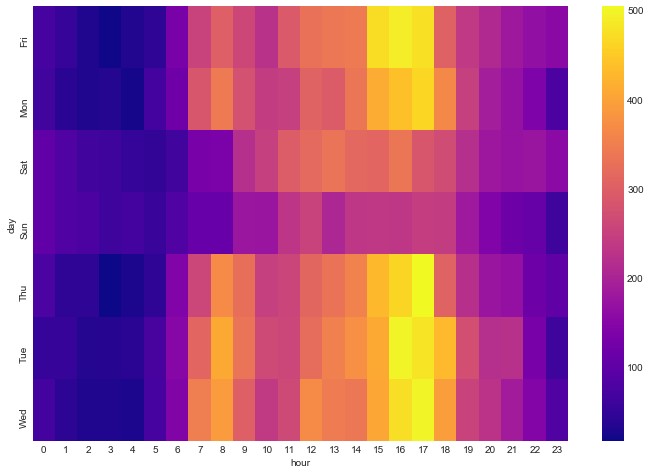

In [471]:
reason_unstack_Traffic =  df[df['Reason']=='Traffic'].groupby(by=['day','hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,8))
sns.heatmap(reason_unstack_Traffic,cmap='plasma')

** Now create a clustermap using this DataFrame. **

<Figure size 1080x576 with 0 Axes>

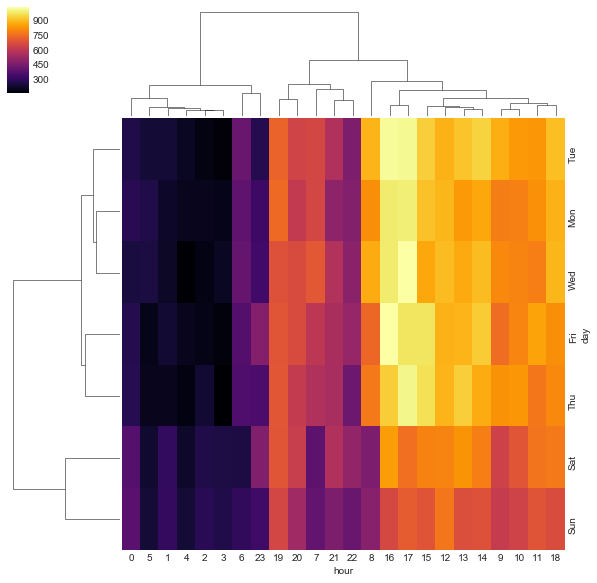

In [478]:
sns.clustermap(reason_unstack,cmap= 'inferno')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [514]:
reason_all = df.groupby(['month','hour']).count()['Reason'].unstack()
reason_ems = df[df['Reason']=='EMS'].groupby(['month','hour']).count()['Reason'].unstack()
reason_fire = df[df['Reason']=='Fire'].groupby(['month','hour']).count()['Reason'].unstack()
reason_traffic = df[df['Reason']=='Traffic'].groupby(['month','hour']).count()['Reason'].unstack()

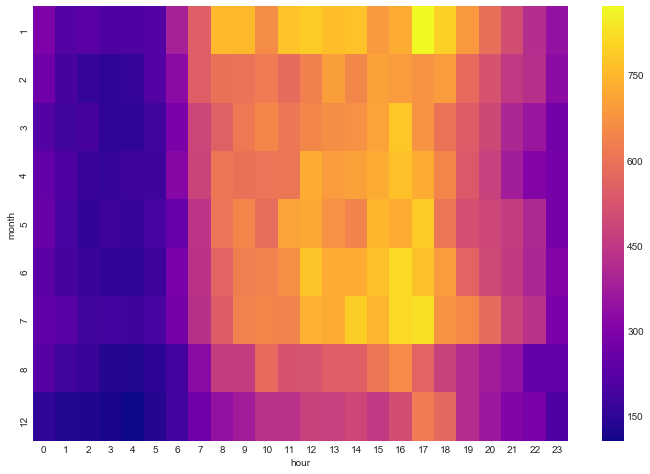

In [505]:
plt.figure(figsize=(12,8))
sns.heatmap(reason_all,cmap='plasma')

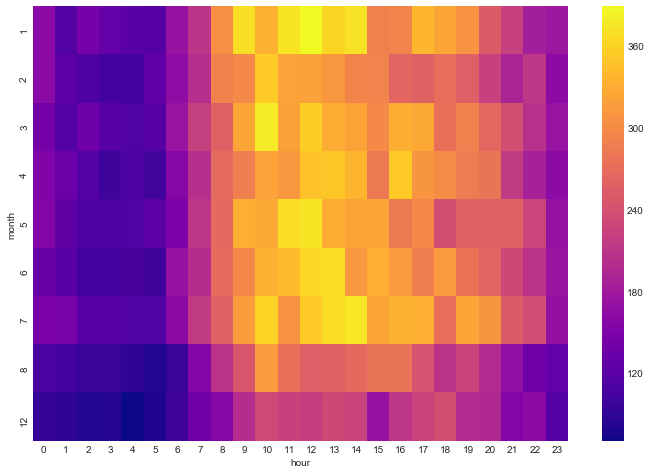

In [507]:
plt.figure(figsize=(12,8))
sns.heatmap(reason_ems,cmap='plasma')

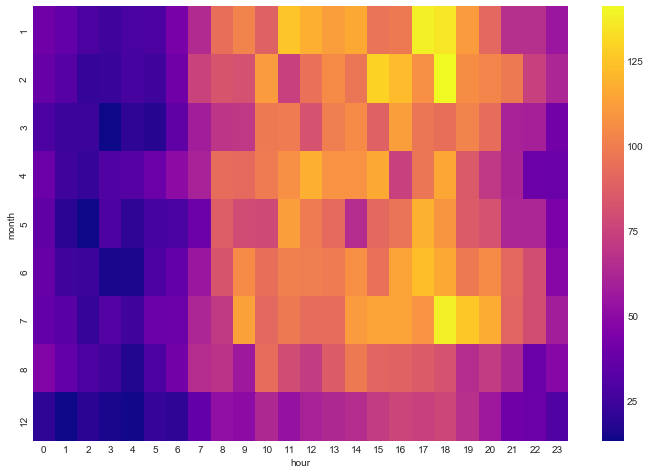

In [508]:
plt.figure(figsize=(12,8))
sns.heatmap(reason_fire,cmap='plasma')

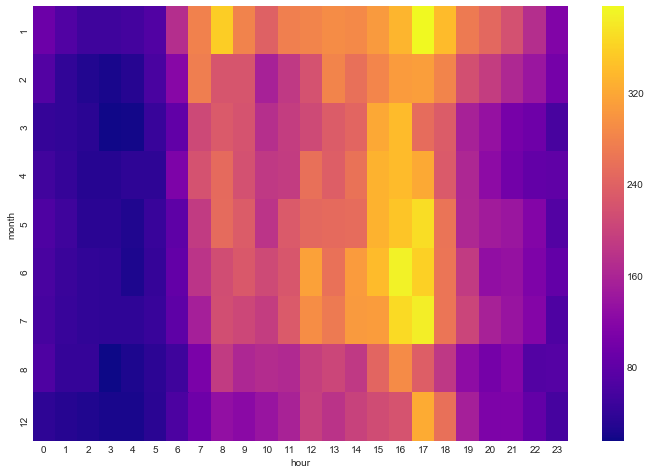

In [509]:
plt.figure(figsize=(12,8))
sns.heatmap(reason_traffic,cmap='plasma')

<Figure size 864x576 with 0 Axes>

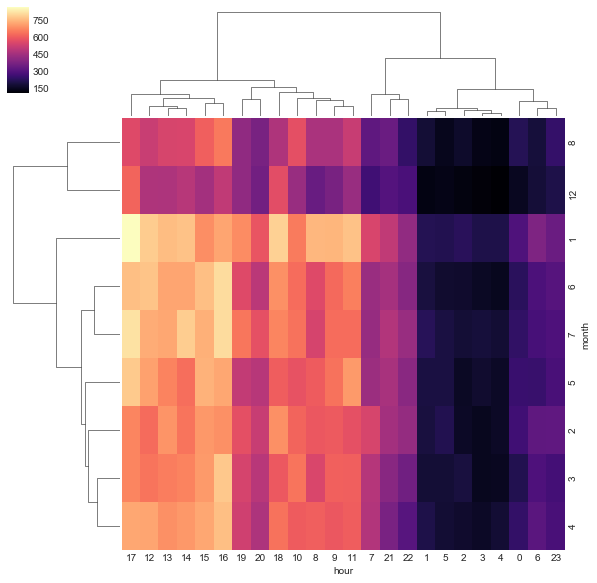

In [510]:
plt.figure(figsize=(12,8))
sns.clustermap(reason_all,cmap='magma')

**Continue exploring the Data however you see fit!**
# Great Job!